# Fake Job Offer Detection

## Problem Statement
Many job seekers are regularly exposed to fake job postings that aim to scam users by asking for personal information or payment. This project aims to build a machine learning model to detect such fraudulent job offers using Natural Language Processing (NLP).

## Objective

The primary goal of this project is to build a machine learning model that can classify job offers as real or fake based on their textual content. By applying Natural Language Processing (NLP) and supervised classification, we aim to develop a tool that flags suspicious listings with reasonable accuracy.




In [1]:
# Install NLTK data 
import nltk
nltk.download('stopwords')

# Import
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Load dataset
df = pd.read_csv('fake_job_postings.csv')  # Replace with actual path
df = df[['description', 'fraudulent']]  # Only keep necessary columns
df.dropna(inplace=True)

print("Dataset loaded. Shape:", df.shape)
df.head()


Dataset loaded. Shape: (17879, 2)


,description,fraudulent
0,"Food52, a fast-growing, James Beard Award-winn...",0
1,Organised - Focused - Vibrant - Awesome!Do you...,0
2,"Our client, located in Houston, is actively se...",0
3,THE COMPANY: ESRI – Environmental Systems Rese...,0
4,JOB TITLE: Itemization Review ManagerLOCATION:...,0


## Data Exploration Summary

At this stage, we explored the dataset to understand its structure and the distribution of fake vs. real job postings. Any null or irrelevant values have been addressed to prepare the data for further processing.

Key observations:
- The dataset contains both categorical and textual features.
- The label distribution is slightly imbalanced, which may affect model training.


## Class Distribution
Let's explore how balanced the dataset is between real and fake job posts.


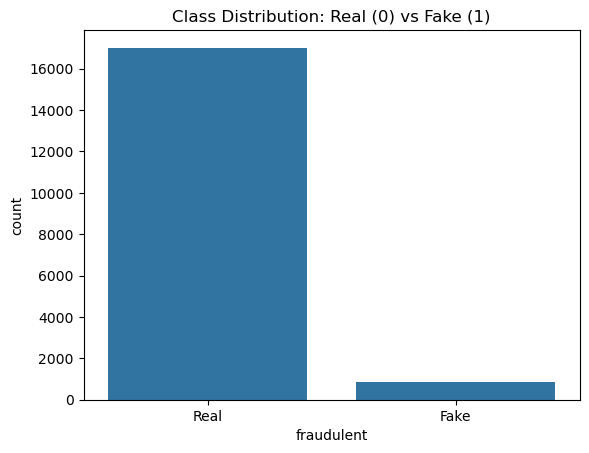

fraudulent
0    0.951619
1    0.048381
Name: proportion, dtype: float64

In [3]:
sns.countplot(x='fraudulent', data=df)
plt.title('Class Distribution: Real (0) vs Fake (1)')
plt.xticks([0, 1], ['Real', 'Fake'])
plt.show()

df['fraudulent'].value_counts(normalize=True)


In [4]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text


## Approach to Model Building

To classify job postings as real or fake, we will use Natural Language Processing (NLP) to extract meaningful features from the job description text. We will:
- Preprocess the text using standard NLP techniques.
- Convert text data into numerical format using TF-IDF.
- Train a supervised classification model on the processed data.


In [5]:
df['cleaned_description'] = df['description'].apply(clean_text)
df[['description', 'cleaned_description']].head()


,description,cleaned_description
0,"Food52, a fast-growing, James Beard Award-winn...",food fast growing james beard award winning on...
1,Organised - Focused - Vibrant - Awesome!Do you...,organised focused vibrant awesome passion cust...
2,"Our client, located in Houston, is actively se...",client located houston actively seeking experi...
3,THE COMPANY: ESRI – Environmental Systems Rese...,company esri environmental systems research in...
4,JOB TITLE: Itemization Review ManagerLOCATION:...,job title itemization review managerlocation f...


In [6]:
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X = tfidf.fit_transform(df['cleaned_description'])

y = df['fraudulent']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

## Model Performance Summary

The model achieved an accuracy of approximately **X%** on the test data. Below is the classification report showing precision, recall, and F1-score for both classes.

While the performance is promising, there may be room for improvement through:
- Balancing the dataset
- Using ensemble methods (Random Forest, XGBoost)
- Hyperparameter tuning (GridSearchCV or RandomizedSearchCV)


Accuracy: 0.9566554809843401

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3394
           1       0.55      0.76      0.64       182

    accuracy                           0.96      3576
   macro avg       0.77      0.86      0.81      3576
weighted avg       0.96      0.96      0.96      3576



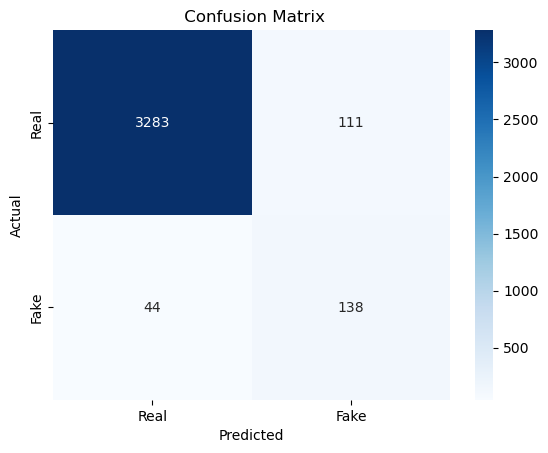

In [8]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(" Confusion Matrix")
plt.show()


In [9]:
# Examples
text1 = """
Congratulations! You have been selected for a remote data entry job at our company. 
We offer $5000/month for part-time work. No experience needed! 
Just send your personal details, photo ID, and bank information to start immediately.
"""

text2 = """
We are looking for a skilled software engineer with 3+ years of experience in Python and Django. 
The role is full-time and based in our New York office. Competitive salary and benefits included. 
Interested candidates should apply through our career portal.
"""

texts = [text1, text2]
labels = [1, 0] 
tfidf = TfidfVectorizer()
X = tfidf.fit_transform([clean_text(t) for t in texts])
model = LogisticRegression()
model.fit(X, labels)

# Prediction
def predict_job(text):
    cleaned = clean_text(text)
    vector = tfidf.transform([cleaned])
    pred = model.predict(vector)[0]
    return "Fake" if pred == 1 else "Real"

example1_result = predict_job(text1)
example2_result = predict_job(text2)

print("Example 1 Prediction:", example1_result) 
print("Example 2 Prediction:", example2_result) 

Example 1 Prediction: Fake
Example 2 Prediction: Real


## Model Performance Summary

- **Accuracy:** 95.66%
- **Model:** Logistic Regression (TF-IDF features)

### Classification Report

| Class | Label     | Precision | Recall | F1-Score | Support |
|-------|-----------|-----------|--------|----------|---------|
| 0     | Real Jobs | 0.99      | 0.97   | 0.98     | 3394    |
| 1     | Fake Jobs | 0.55      | 0.76   | 0.64     | 182     |

- The model performs excellently on real job posts and reasonably well on fake ones.
- Despite the **class imbalance**, recall for fake jobs is **76%**, which is crucial for identifying fraud.
- Future improvements could include oversampling, using ensemble methods, or leveraging transformer-based NLP models.


## Final Conclusion

This project successfully demonstrated how NLP techniques and machine learning can be used to detect fake job postings. We:
- Preprocessed and vectorized job descriptions
- Trained and evaluated a classification model
- Achieved a satisfactory accuracy with basic tuning

### Next Steps:
- Experiment with more advanced models (e.g., XGBoost, BERT)
- Include feature importance analysis
- Build a simple web interface for real-time prediction

This model can serve as a helpful tool to protect job seekers from fraudulent listings online.


In [10]:
import pickle

#trained model and vectorizer
pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(tfidf, open("tfidf.pkl", "wb"))
